<a href="https://colab.research.google.com/github/Alex-Chen1121/Machine-learning/blob/main/7_15_Sobel%E9%81%8B%E7%AE%97%E5%AD%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 從網路抓圖
from urllib.request import urlretrieve
url = ""
# 要給檔案路徑(網址) 檔名
# urlretrieve(url, "xxx.jpg")

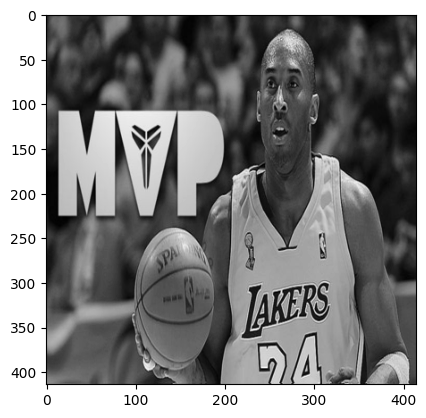

In [ ]:
# convert("L") 轉成八位素黑白照

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("kobe.jpg").convert("L").resize((414, 414))
img_np = np.array(img)
plt.imshow(img_np, cmap="gray")

In [ ]:
img_np.shape

(414, 414)

In [ ]:
img_np.shape

(414, 414)

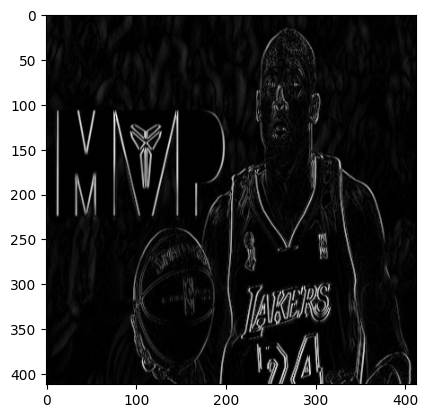

In [ ]:
def gx(ci, cj, img):
    w = [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ]
    total = 0
    for i in range(3):
        for j in range(3):
            ri, rj = ci+i-1, cj+j-1
            total = total + img[ri][rj] * w[i][j]
    return abs(total)

h, w = img_np.shape
new_x = np.zeros(shape=(h-2, w-2))
for i in range(1, h-1):
    for j in range(1, w-1):
        new_x[i-1][j-1] = gx(i, j, img_np)
new_x_norm = (new_x - new_x.min()) / (new_x.max() - new_x.min())
plt.imshow(new_x_norm, cmap="gray")

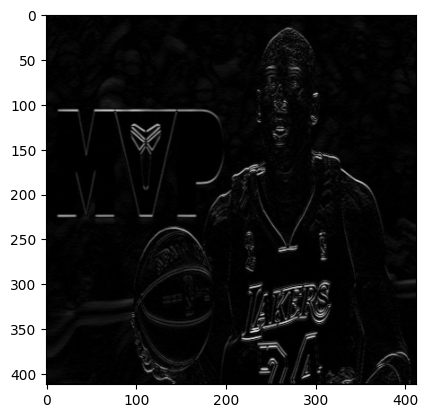

In [ ]:
def gy(ci, cj, img):
    w = [
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ]
    total = 0
    for i in range(3):
        for j in range(3):
            ri, rj = ci+i-1, cj+j-1
            total = total + img[ri][rj] * w[i][j]
    return abs(total)

h, w = img_np.shape
new_y = np.zeros(shape=(h-2, w-2))
for i in range(1, h-1):
    for j in range(1, w-1):
        new_y[i-1][j-1] = gy(i, j, img_np)
new_y_norm = (new_y - new_y.min()) / (new_y.max() - new_y.min())
plt.imshow(new_y_norm, cmap="gray")

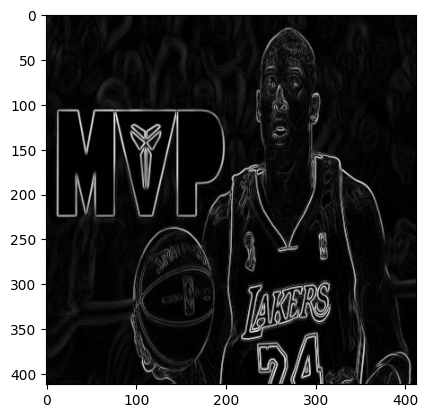

In [ ]:
new_total = (new_x_norm ** 2 + new_y_norm ** 2) ** 0.5
plt.imshow(new_total, cmap="gray")


### 色彩系統
CMYK(影印機使用)
HSV系統
H : 色相
S :
V :   

只要組合附近的像素點 就是卷積的概念

In [ ]:
# 處理圖片時 always確認他是RGB格式
img = Image.open("kobe.jpg").convert("RGB").resize((414, 414))
img_np = np.array(img)

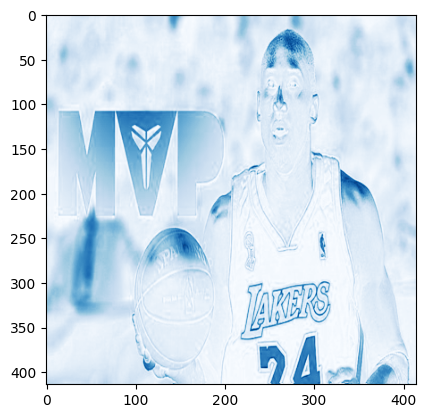

In [ ]:
# demo numpy 操作
img_np.shape
plt.imshow(img_np[:,::-1,:]) # 上下軸取反
plt.imshow(img_np[:,:, 2], cmap="Blues") # 只取單一次色彩分布

In [ ]:
img_np = img_np / 255.0
img_new = img_np[:,:, 0] * 0.299 +img_np[:,:, 1] *0.587 +img_np[:,:, 2] * 0.114

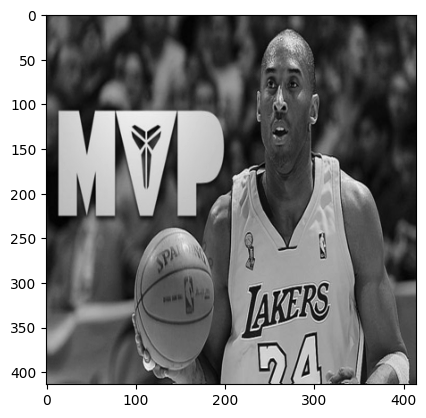

In [ ]:
# 畫圖只有兩種模式 0-255整數模式 0-1小數模式

plt.imshow(img_new, cmap="gray")

OpenCV的索伯運算子

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

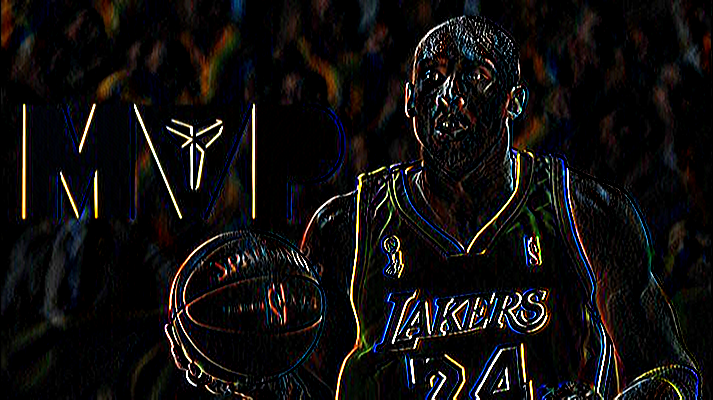

In [ ]:
img = cv2.imread("kobe.jpg")
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
cv2_imshow(sobelx)

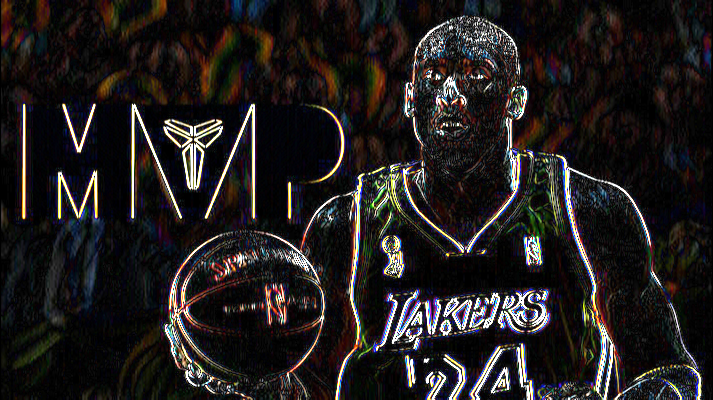

In [ ]:
# 轉成絕對值
img = cv2.imread("kobe.jpg")
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
cv2_imshow(sobelx)